**Navn på gruppens medlemmer:**

# Numerisk beregning av energier for partikkel i endelig brønnpotensiale

For en partikkel i en endelig brønn med bredde $L$ og dybde $V_0$ er
$$ V(x) = \begin{cases} -V_0 & \text{for}\,\, 0 < x < L \\ 0 & \text{ellers} \end{cases} $$

Energiene til partikkelen er
$$E = \frac{2 \hbar^2 z^2}{m L^2} - V_0,$$
der $z$ er (reelle) løsninger av ligningene
$$\tan{(z)} = \sqrt{\frac{z_0^2}{z^2} - 1} \qquad \text{og} \qquad \tan{\left(z + \frac{\pi}{2}\right)} = \sqrt{\frac{z_0^2}{z^2} - 1}$$
med $z_0 = \frac{L}{2 \hbar} \sqrt{2 m V_0}.$
Energiene kan i dette tilfellet ikke angis ved hjelp av enkle analytiske uttrykk. 
Vi skal her løse disse ligningene numerisk.

**Finn energinivåene til en partikkel i en endelig brønn numerisk. Vi har foreslått en framgangsmåte nedenfor.**
1. **Plott funksjonene som involverer $z$ i ligningene over, så du kan se grafisk omtrent hvor løsningene ligger.**
2. **Lokalisér intervaller på $z$-aksen som hver inneholder nøyaktig én løsning.**
3. **Benytt en numerisk metode til å finne løsningen på hvert av intervallene. Kontrollér at de er korrekte ved å plotte dem sammen med funksjonene.**

C:\Users\frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


her


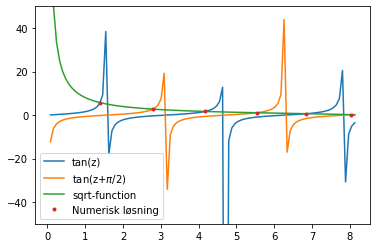

In [2]:
# if using Jupyter Notebook, use interactive "notebook" backend for best results
# if using Jupyter Lab, use interactive "widget" backend for best results
# if both fail, use static "inline" backend
#%matplotlib notebook 
#%matplotlib widget 
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import scipy.optimize as opt

#Task 2
hbar =1.05e-34
m=9.11e-31
N=100

L=1e-9
eV = 1.60e-19
V0 = 10*eV
z0=L/(2*hbar)*np.sqrt(2*m*V0)
z=np.linspace(0,z0,N+1)
z=z[1:]
dz=z[1]-z[0]




##### numerical solution #####
firstTan = lambda x: np.sqrt(z0**2/x**2-1)-np.tan(x)
secondTan = lambda x: np.sqrt(z0**2/x**2-1)-np.tan(x+np.pi/2)
zNulls = []

counter = 0
for i in np.arange(dz,8,np.pi/2):
    if counter%2==0:
        zNulls.append(opt.bisect(firstTan,i+2*dz,i+np.pi/2-2*dz))
    else:

        zNulls.append(opt.bisect(secondTan,i+dz,i+np.pi/2-dz))
    counter+=1
    
zNulls = np.array(zNulls)


axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([-50,50])
print("her")
plt.plot(z,np.tan(z), label="tan(z)")
plt.plot(z,np.tan(z+np.pi/2), label="tan(z+$\pi$/2)")
plt.plot(z,np.sqrt(z0**2/z**2-1), label="sqrt-function")
plt.plot(zNulls, np.sqrt(z0**2/zNulls**2-1), 'o', markersize=3, label="Numerisk løsning")
plt.legend()
plt.show()


# Shooting-metoden

I den første numeriske øvingen løste vi den tidsuavhengige Schrödingerligningen numerisk ved å finne egenverdiene og egenvektorene til en matrise.
Vi skal her se på en alternativ og mer illustrerende numerisk teknikk for å løse ligningen.
Teknikken kan brukes på alle potensialer, men vi begrenser oss her til potensialer som er symmetriske om $x = 0$, noe som gjør den litt enklere i bruk.

Vi kommer til å få bruk for noen viktige egenskaper til de stasjonære tilstandene.
* Den $n$-te eksiterte tilstanden $\psi(x)$ i et symmetrisk potensial $V(x) = V(-x)$ er
    * **symmetrisk** og **krysser ikke** $x$-aksen i origo for **partalls**-$n$. Altså er $\psi(-x) = \psi(x)$ og $\psi(0) \neq 0$.
    * **antisymmetrisk** og **krysser** $x$-aksen i origo for **oddetalls**-$n$. Altså er $\psi(-x) = -\psi(x)$ og $\psi(0) = 0$.
* Den $n$-te eksiterte tilstanden $\psi(x)$ har $n$ nullpunkter.

Schrödingerligningen
$$ \hat{H} \psi = -\frac{\hbar^2}{2 m} \psi'' + V \psi = E \psi $$
har, matematisk sett, løsninger for *alle* verdier av $E$.
Gitt et par randverdier og en energi $E$, er det i teorien bare å integrere i vei for å finne en passende funksjon $\psi(x)$.
Men i fysikken er vi kun interessert i *fysisk akseptable løsninger* av ligningen som kan beskrive fysiske partikler.
Disse skal beskrive en sannsynlighetstetthet $|\psi|^2$ for posisjonen til en partikkel ved en måling, og må derfor være normerte, dvs. $\int |\psi|^2 \mathrm{d} x$ = 1, noe som krever at $\psi(x) \rightarrow 0$ (tilstrekkelig raskt) når $x \rightarrow \pm \infty$.
Vi skal her se hvordan nettopp dette kravet legger (store) begrensninger på hva energiene $E$ kan være.

For å finne fysisk akseptable verdier for $E$ (og dermed $\psi)$, kan vi derfor gå fram på følgende måte:
1. Gjett en energi $E$.
2. Finn to kjente randverdier for $\psi(x)$.
3. Integrér Schrödingerligningen for å finne den passende funksjonen $\psi(x)$.
4. Undersøk om $\psi(x)$ er en fysisk akseptabel løsning.
    1. Hvis $\psi(x) \rightarrow 0$ når $x \rightarrow \pm \infty$, kan $\psi(x)$ normeres til en fysisk akseptabel løsning, og vi har gjettet en riktig verdi for $E$.
    2. Hvis ikke $\psi(x) \rightarrow 0$ når $x \rightarrow \pm \infty$, er $\psi(x)$ ikke en fysisk akseptabel løsning, og vi har gjettet en gal verdi for $E$.

Kort oppsummert gjetter vi en energi $E$ og "skyter" etter en passende funksjon $\psi(x)$ fra kjente randverdier, før vi undersøker om vi "treffer" $\psi = 0$ i $x = \pm \infty$. Metoden kalles derfor gjerne [the shooting method](https://en.wikipedia.org/wiki/Shooting_method) på engelsk.

I den første numeriske øvingen tilnærmet vi den tidsuavhengige Schrödingerligningen som
$$-\frac{\hbar^2}{2 m} \frac{\psi_{i+1} - 2 \psi_i + \psi_{i-1}}{{\Delta x}^2} + V_i \psi_i = E \psi_i$$
Vi lar her $i = 0$ svare til $x = 0$.
Så lenge vi kjenner to verdier av $\psi_i$ ved siden av hverandre, kan vi bruke denne ligningen til å finne verdiene $\psi_i$ for alle $i$.

I et symmetrisk potensial kan vi for oddetalls-$n$ utnytte $\psi(0) = 0$ til å sette $\psi_0 = 0$ og $\psi_1$ til en vilkårlig verdi forskjellig fra $0$, for eksempel $\psi_1 = 1$.
Deretter kan vi benytte den tilnærmede Schrödingerligningen til å finne resten av verdiene $\psi_i$.
Hvis det ser ut til at $\psi \rightarrow 0$ for store $|x|$, kan vi normere $\psi$ for å finne en fysisk akseptabel løsning.
Den konkrete verdien vi velger for $\psi_1$ er uten betydning, da den uansett blir korrigert ved normeringen.

For partalls-$n$ utnytter vi tilsvarende $\psi(0) \neq 0$ til å sette for eksempel $\psi_0 = 1$.
Vi kan så utnytte symmetrien $\psi_1 = \psi_{-1}$ til å finne $\psi_1$ fra den tilnærmede Schrödingerligningen.
Så kan vi igjen integrere ligningen og sjekke om energien svarer til en akseptabel løsning.

**Skriv en funksjon som skyter etter en symmetrisk eller antisymmetrisk kandidat for energiegenfunksjonen $\psi(x)$ med energi $E$ til en partikkel med masse $m$ i et symmetrisk potensial $V(x)$. Den skal returnere integrasjonspunkter $x_i$, funksjonsverdiene $\psi_i = \psi(x_i)$ i disse punktene og antall nullpunkter i $\psi(x)$. Funksjonen skal skyte ut fra origo i begge retninger og må stoppe å skyte etter en endelig avstand eller når det er åpenbart at $\psi(x)$ divergerer, men den behøver ikke normere $\psi(x)$.**

In [15]:
E=0.49*hbar*1e-15
"""
symmetrisk:
psi[0] = 0
alle andre psier:
psi[1] = 2*psi_{i+1}
^ gjør for i in range(1,len(z)) (?)
"""

def findRoots(psi):
    counter = 0
    for i in range(1,len(psi)):
        if psi[i-1]*psi[i]<0:
            counter+=1
    return counter

def stdPsi(n,isSymm=True): #Helping function for getPsi
    if isSymm:
        return (-E*dz**2*m*getPsi(n-1,isSymm)+V0*dz**2*m*getPsi(n-1,isSymm)+hbar**2*getPsi(n-1,isSymm))/hbar**2
    else:
        return -((-E*dz**2*m*getPsi(n-1,isSymm)+V0*dz**2*m*getPsi(n-1,isSymm)+hbar**2*getPsi(n-1,isSymm))/hbar**2)

def getPsi(n, SoA): # bool SoA==True|symmetric && SoA==False|antisymmetric
    if n%2==0: #even
        if n==0:
            return 0
        elif n==1:
            return 1
        else:
            if SoA:
                return stdPsi(n,True)
            else:
                return stdPsi(n,False)
    else: # odd n
        if n==0:
            return 1
        else:
            if SoA:
                return stdPsi(n,True)
            else:
                return stdPsi(n,False)
    
for i in range(10):
    print(getPsi(i,False)) #I am so lost rn sorry girl

0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


**Test funksjonen på et elektron i grunntilstanden i en harmonisk oscillator ved å skyte med energier rett over og under $E = 0.50 \hbar \omega$, for eksempel $E = 0.49 \hbar \omega$ og $E = 0.51 \hbar \omega$. Hva skjer?**

In [ ]:
E = 0.49*hbar*w
E = 0.51*hbar*w # What's w?

Vi kan systematisere gjettingen av $E$ på en måte som lar oss søke etter energien og energiegenfunksjonen til en vilkårlig $n$-te eksiterte tilstand.

Anta at vi vet med sikkerhet at $E$ ligger mellom $E_1$ og $E_2$ (der $E_2 > E_1$), og la disse energiene svare til funksjonene $\psi_1$ og $\psi_2$ med $n_1$ og $n_2$ nullpunkter.
Da er $n_1 \leq n$ og $n_2 > n$.
Vi kan så skyte ut en ny funksjon $\psi_0$ med energien $E_0 = (E_1 + E_2) / 2$ og $n_0$ nullpunkter.
Hvis $n_0 \leq n$, er $E_0$ en bedre nedre skranke for $E$ enn $E_1$.
Hvis $n_0 > n$, derimot, er $E_0$ en bedre øvre skranke til $E$ enn $E_2$.
Vi kan dermed bytte ut en av skrankene med $E_0$ og gjenta prosessen for å finne et gradvis mindre intervall der energien ligger.
Når intervallet er så lite at vi er fornøyd med en hvilken som helst energiverdi på intervallet, stopper vi prosessen.

Men hvordan finner vi to skranker $E_1$ og $E_2$ til å begynne med, hvis vi ikke aner hva den virkelige energien er?
En enkel måte er å sjekke antall nullpunkter $n_0$ som svarer til en vilkårlig $E_0$, for eksempel $E_0 = 0$.
Denne energien må være enten en nedre eller øvre skranke for $E$.
Vi kan så finne den andre skranken ved å sette $E_1 = -1$ (eller $E_2 = +1$), og så senke (eller øke) denne energien gradvis til vi finner den andre skranken.
Dette kan gjøres veldig raskt hvis vi øker avstanden mellom $E_1$ og $E_2$ eksponensielt.
Så kan vi sette i gang med halveringsmetoden for å finne energien.

**Finn energien til den 60. eksiterte tilstanden for et elektron i en harmonisk oscillator.**

**Du kan gjøre oppgaven på en generell og "automatisk" måte som fungerer for en vilkårlig $n$ og et vilkårlig symmetrisk potensial $V(x)$. Kombinér i så fall metoden for å finne to initielle skranker $E_1$ og $E_2$ med halveringsmetoden.**

**Du kan også gjøre oppgaven på en "manuell", men like illustrerende måte. Du kan i så fall skyte og plotte funksjoner med varierende energi $E$ og justere energiene etter visuell inspeksjon av plottene inntil du vet med god presisjon hva energien må være.**